In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [19]:
df = pd.read_csv(r"/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv")

In [20]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [21]:
df.shape

(374, 13)

In [22]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [25]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [26]:
df.describe(include=["O"])

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78


In [27]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [28]:
df.drop(columns="Sleep Disorder" , axis=1 ,inplace=True)

In [29]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [30]:
df.shape

(374, 12)

In [31]:
df.set_index("Person ID", inplace=True)

In [32]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
Person ID,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000


In [33]:
df.corr(numeric_only=True)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


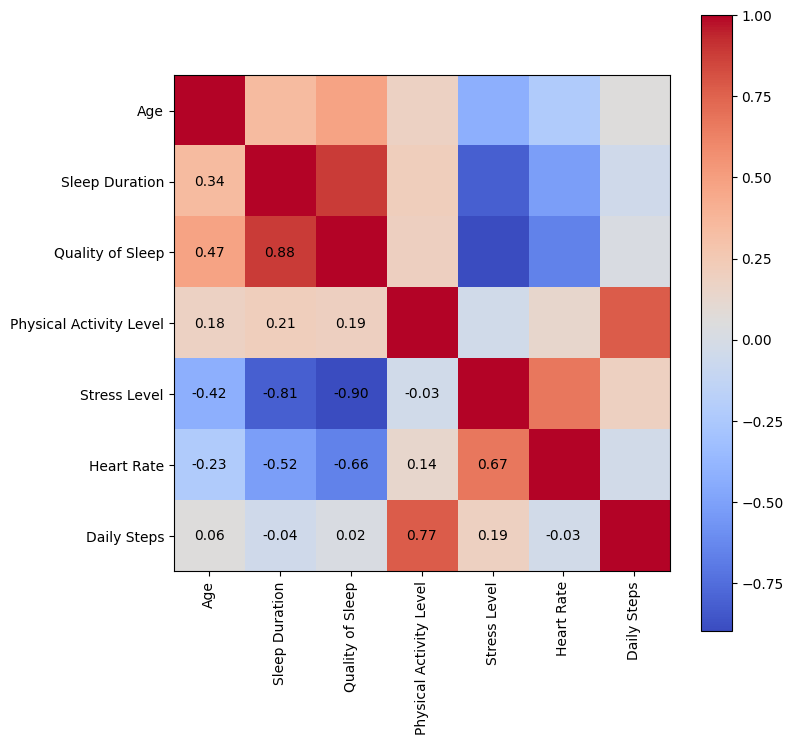

In [34]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 8))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.show()


In [35]:
df.Gender.value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

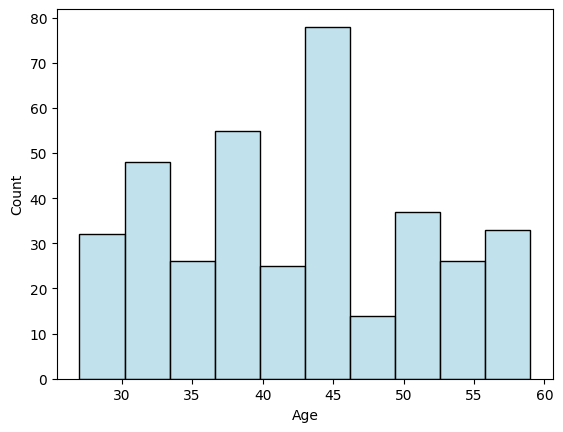

In [36]:
sns.histplot(df.Age , color="lightblue" )

<Axes: xlabel='Age', ylabel='Count'>

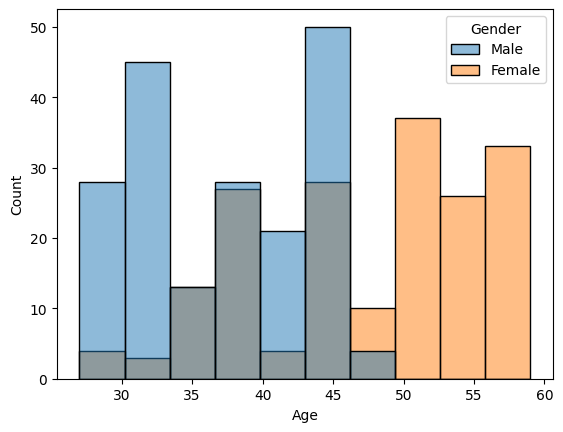

In [37]:
sns.histplot(data=df, x='Age', hue='Gender', color='lightblue')

In [38]:
df.Occupation.value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

<Axes: xlabel='Occupation', ylabel='count'>

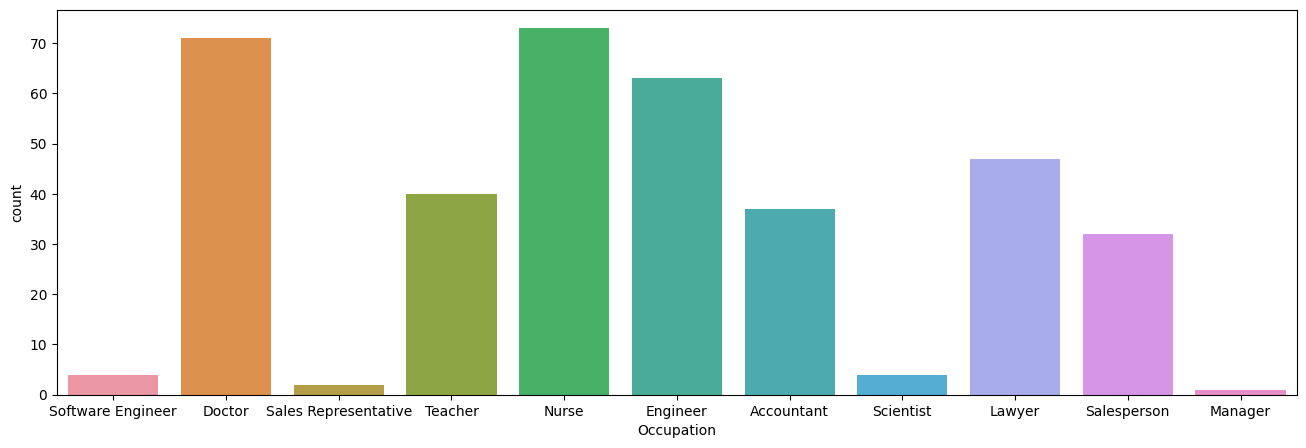

In [39]:
plt.figure(figsize=(16, 5))
sns.countplot(x=df.Occupation)

<Axes: xlabel='Occupation', ylabel='count'>

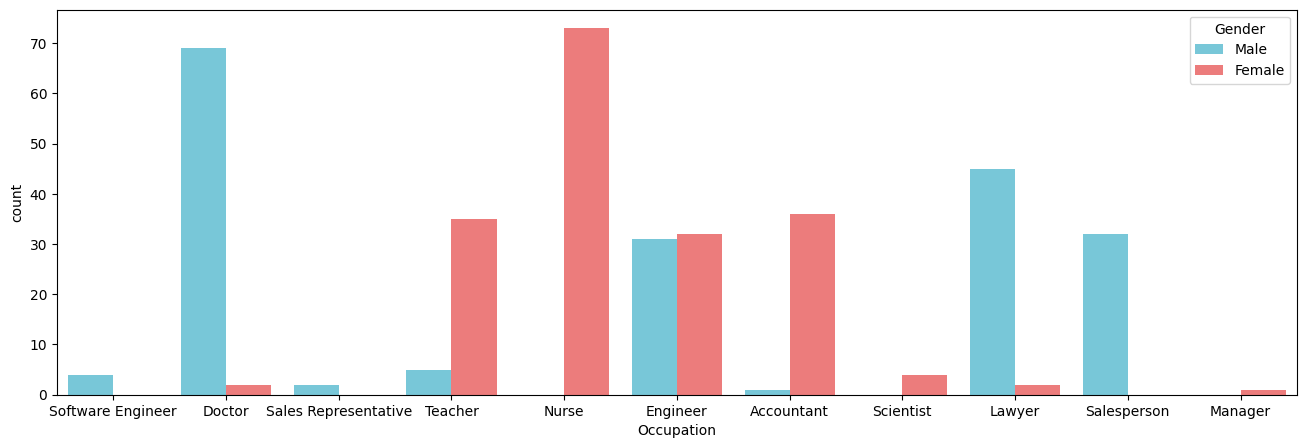

In [40]:
plt.figure(figsize=(16, 5))
sns.countplot(x='Occupation', hue='Gender', data=df ,palette={"#FF6969" , "#68D2E8"})

In [41]:
df["Sleep Duration"].min()

5.8

In [42]:
df["Sleep Duration"].max()

8.5

In [43]:
df["Sleep Duration"].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

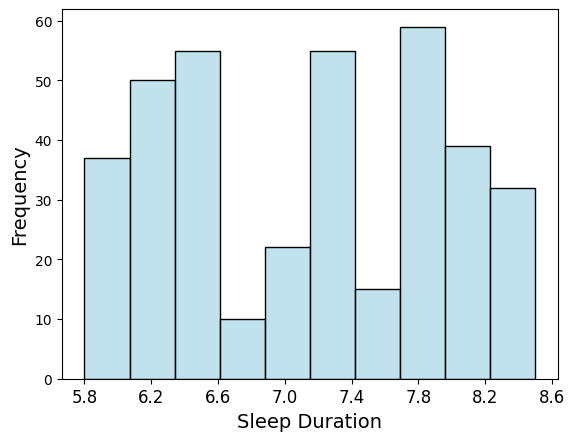

In [44]:
sns.histplot(df["Sleep Duration"] , color="lightblue" )

plt.xticks(ticks=np.arange(df["Sleep Duration"].min(), df["Sleep Duration"].max()+0.5, step=0.4), fontsize=12)
plt.xlabel("Sleep Duration", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()



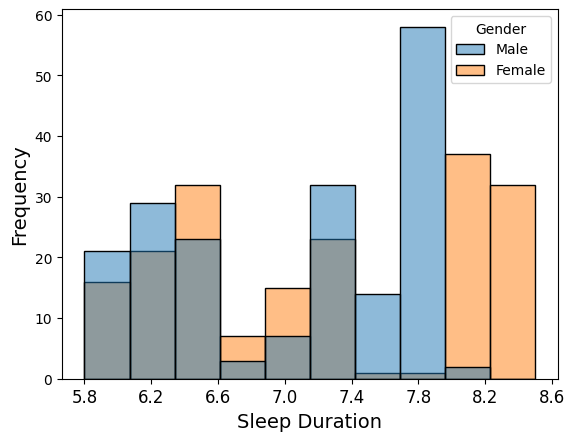

In [45]:
sns.histplot(data=df , x=df["Sleep Duration"] , color="lightblue" ,hue="Gender")
plt.xticks(ticks=np.arange(df["Sleep Duration"].min(), df["Sleep Duration"].max()+0.5, step=0.4 ), fontsize=12)
plt.xlabel("Sleep Duration", fontsize=14)
plt.ylabel("Frequency", fontsize=14)


plt.show()



In [46]:
pd.set_option('display.max_rows', None)
new = df.groupby("Sleep Duration")["Occupation"].value_counts().reset_index()
new

,Sleep Duration,Occupation,count
0,5.8,Scientist,2
1,5.9,Sales Representative,2
2,5.9,Nurse,1
3,5.9,Software Engineer,1
4,6.0,Doctor,18
5,6.0,Nurse,13
6,6.1,Nurse,15
7,6.1,Doctor,9
8,6.1,Software Engineer,1
9,6.2,Doctor,6


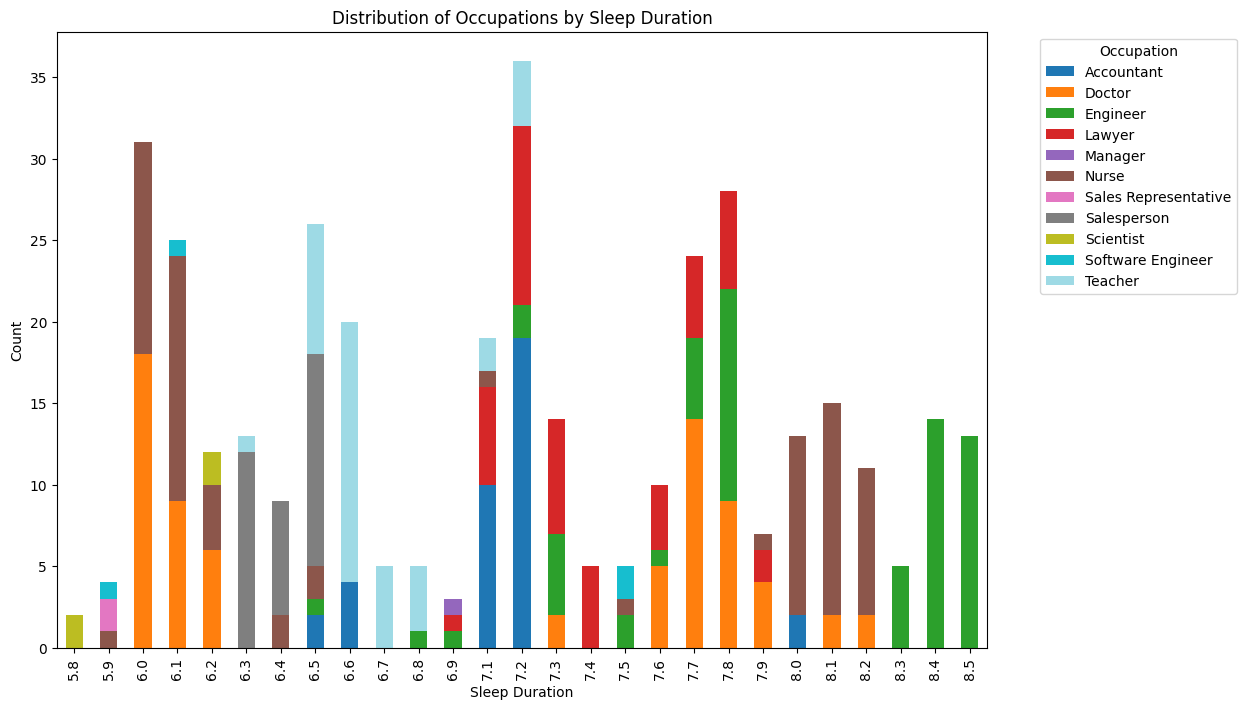

In [47]:
pivot_data = df.groupby(["Sleep Duration", "Occupation"]).size().unstack().fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Distribution of Occupations by Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Count')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [48]:
top_occupations = df.groupby("Sleep Duration")["Occupation"].apply(lambda x: x.value_counts().index[0])
print(top_occupations)

Sleep Duration
5.8               Scientist
5.9    Sales Representative
6.0                  Doctor
6.1                   Nurse
6.2                  Doctor
6.3             Salesperson
6.4             Salesperson
6.5             Salesperson
6.6                 Teacher
6.7                 Teacher
6.8                 Teacher
6.9                  Lawyer
7.1              Accountant
7.2              Accountant
7.3                  Lawyer
7.4                  Lawyer
7.5                Engineer
7.6                  Doctor
7.7                  Doctor
7.8                Engineer
7.9                  Doctor
8.0                   Nurse
8.1                   Nurse
8.2                   Nurse
8.3                Engineer
8.4                Engineer
8.5                Engineer
Name: Occupation, dtype: object


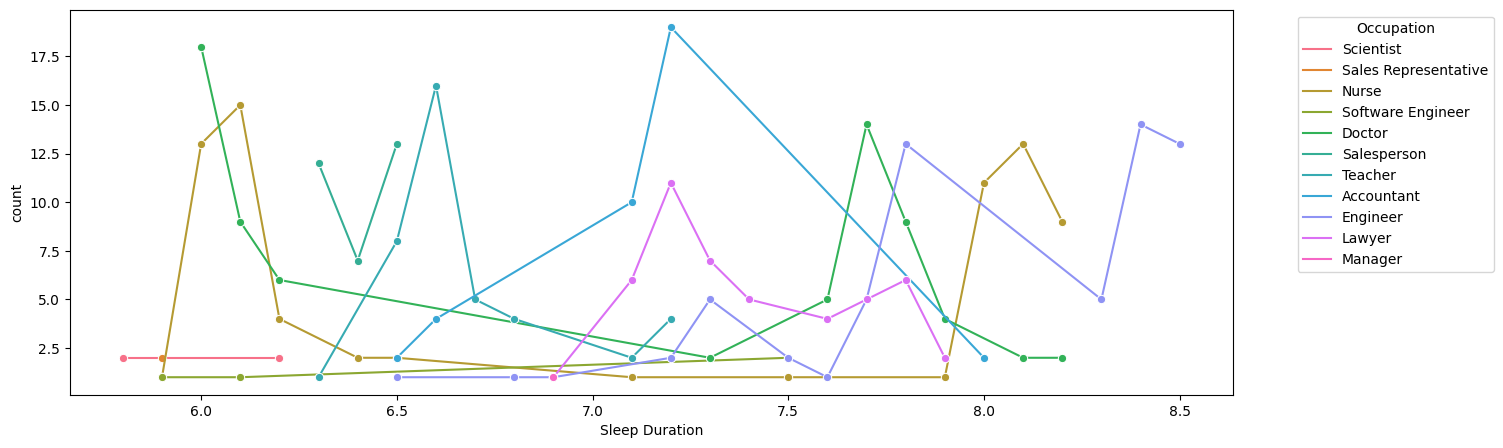

In [49]:
plt.figure(figsize=(15,5))
sns.lineplot(data=new, x="Sleep Duration", y="count", hue="Occupation", marker='o')
plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')


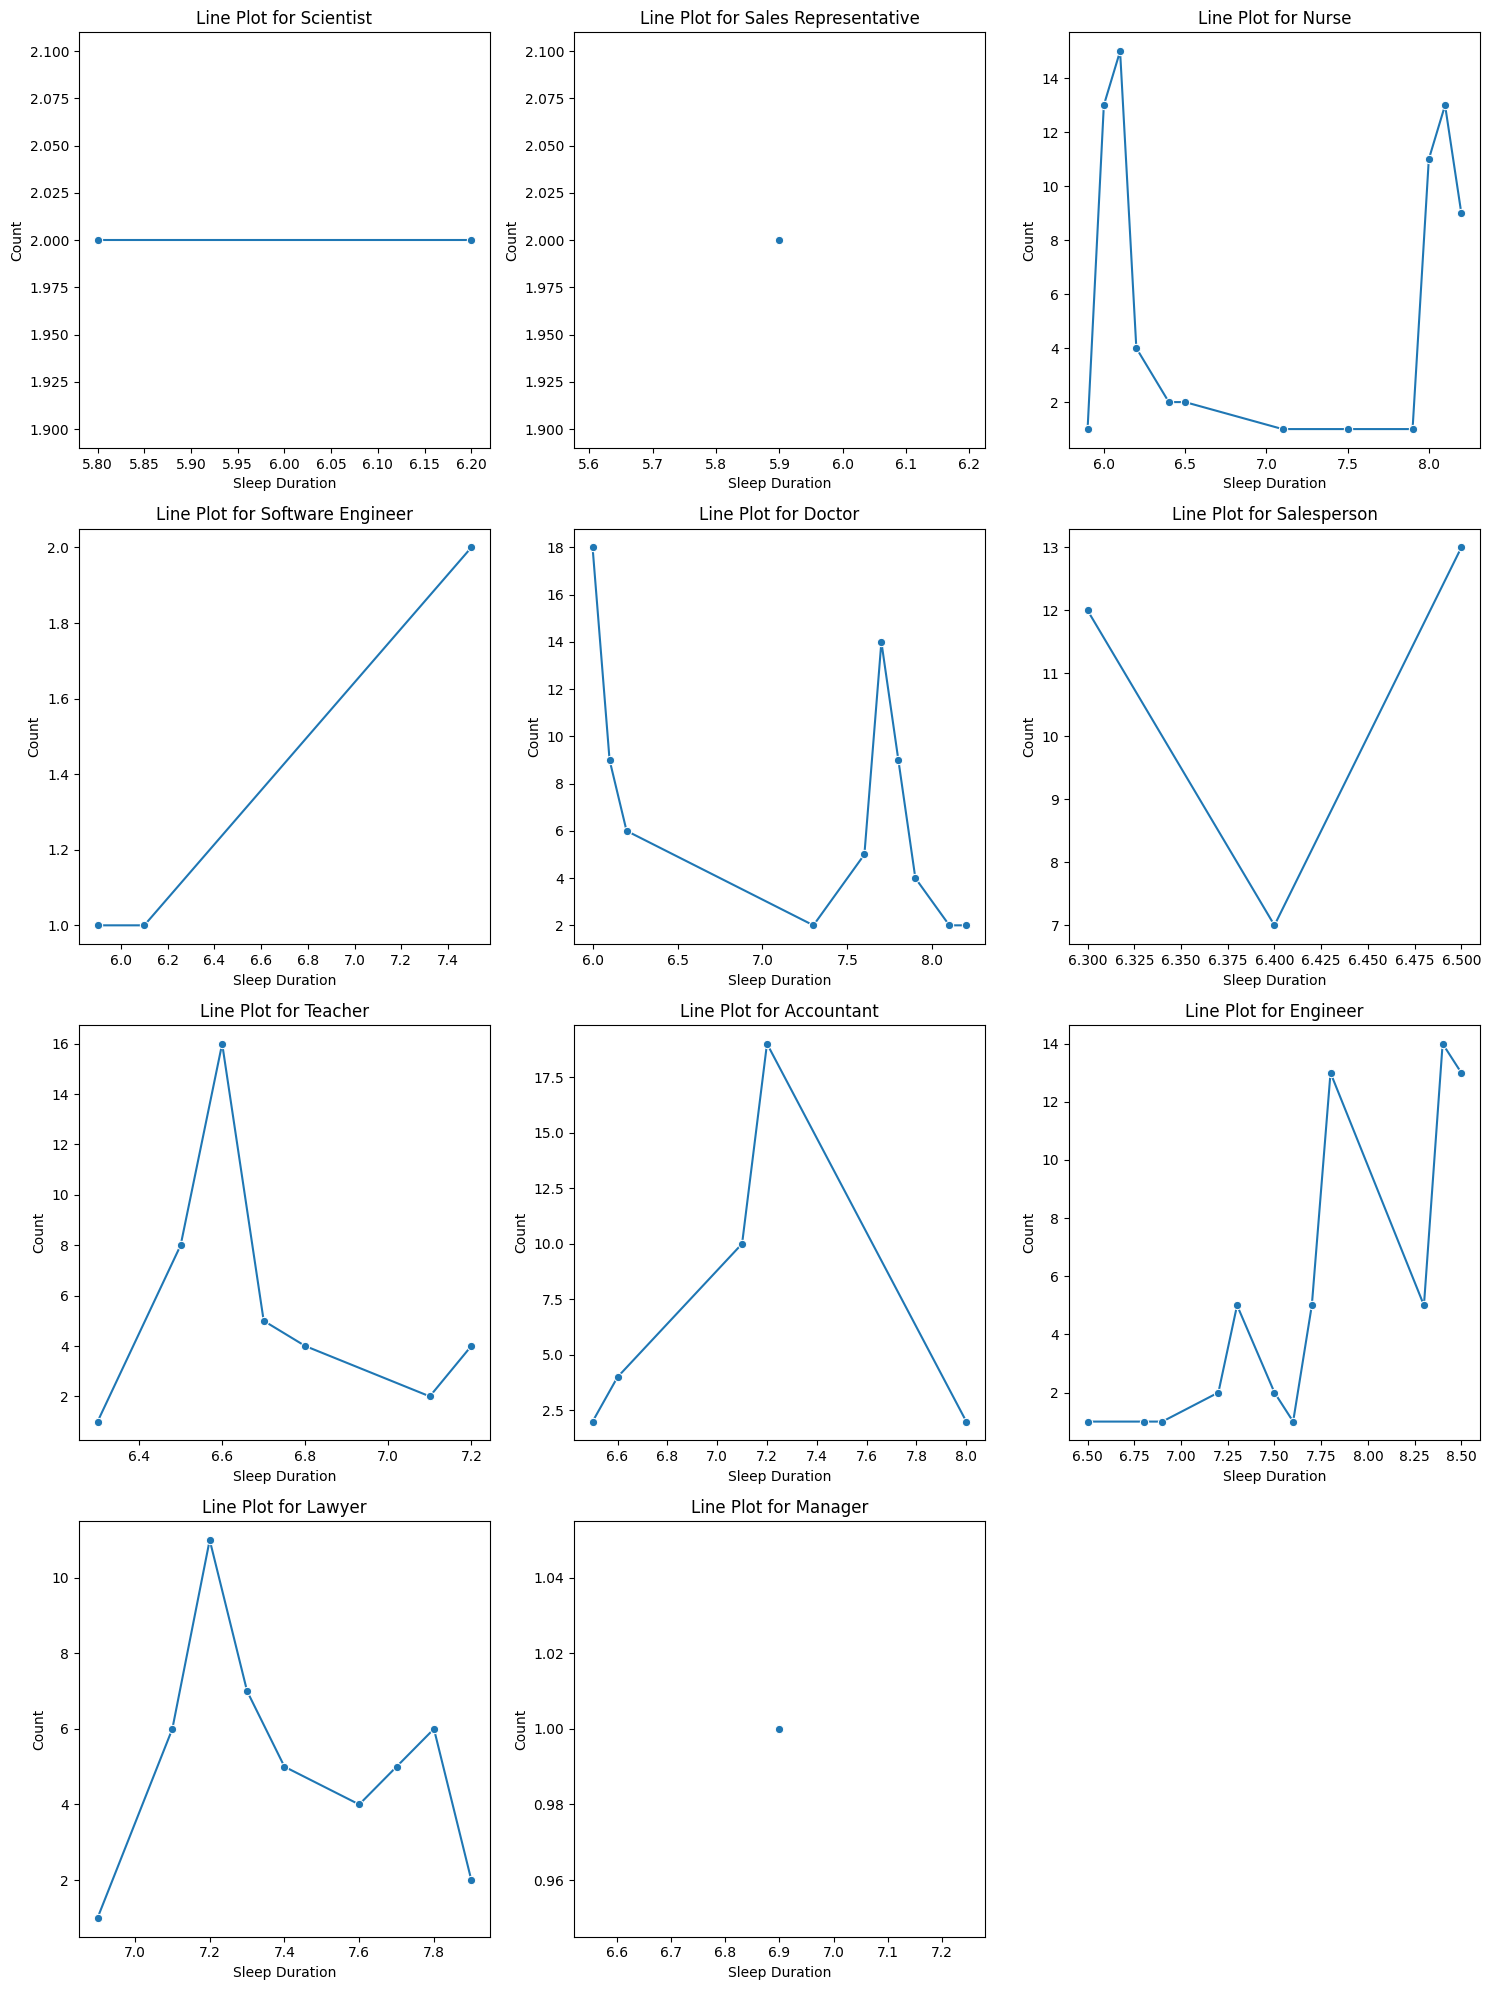

In [50]:
occupations = new['Occupation'].unique()
num_occupations = len(occupations)

num_cols = 3  
num_rows = (num_occupations + num_cols - 1) // num_cols  # حساب عدد الصفوف

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # تحويل المحاور إلى مصفوفة أحادية الأبعاد


for ax, occupation in zip(axes, occupations):
    sns.lineplot(data=new[new['Occupation'] == occupation], x="Sleep Duration", y="count", marker='o', ax=ax)
    ax.set_title(f'Line Plot for {occupation}')
    ax.set_xlabel('Sleep Duration')
    ax.set_ylabel('Count')

# إخفاء المحاور غير المستخدمة
for ax in axes[num_occupations:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [51]:
df["Quality of Sleep"].value_counts()

Quality of Sleep
8    109
6    105
7     77
9     71
5      7
4      5
Name: count, dtype: int64

In [52]:
df["Quality of Sleep"].value_counts(normalize=True).mul(100).round(2)

Quality of Sleep
8    29.14
6    28.07
7    20.59
9    18.98
5     1.87
4     1.34
Name: proportion, dtype: float64

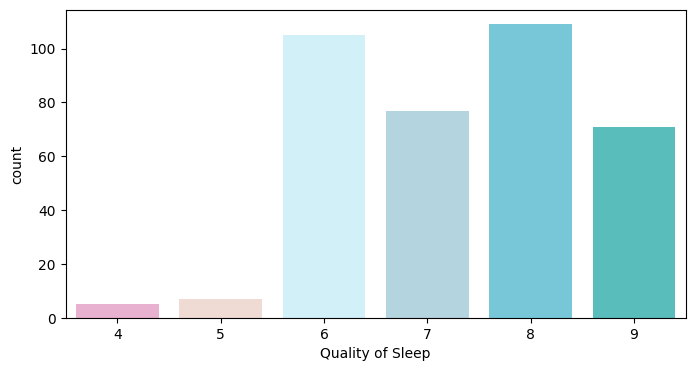

In [53]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Quality of Sleep" ,data=df , palette=[ "#F0A8D0" ,"#F4D9D0"  ,"#CAF4FF"  ,"lightblue" ,"#68D2E8" ,"#48CFCB" ])
plt.show()

<Axes: xlabel='Quality of Sleep', ylabel='Occupation'>

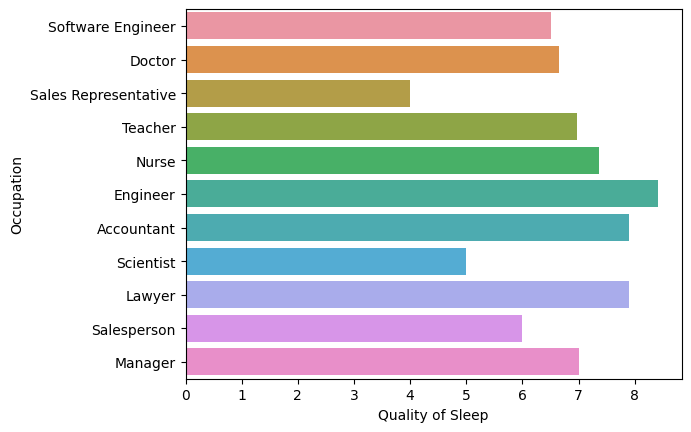

In [54]:
sns.barplot(data=df ,x="Quality of Sleep" , y="Occupation" , ci=None)

<Axes: xlabel='Quality of Sleep', ylabel='Occupation'>

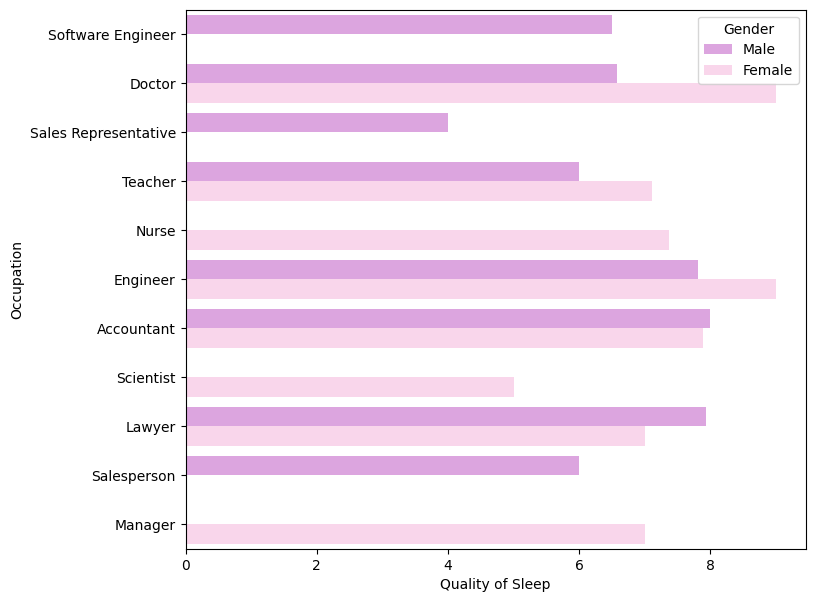

In [55]:
plt.figure(figsize=(8, 7))
sns.barplot(data=df ,x="Quality of Sleep" , y="Occupation" ,hue ="Gender" ,  ci=None , palette={"#FFD0EC" ,"#E59BE9"})

In [56]:
df["Physical Activity Level"].value_counts()

Physical Activity Level
60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1
Name: count, dtype: int64

<Axes: xlabel='Physical Activity Level', ylabel='count'>

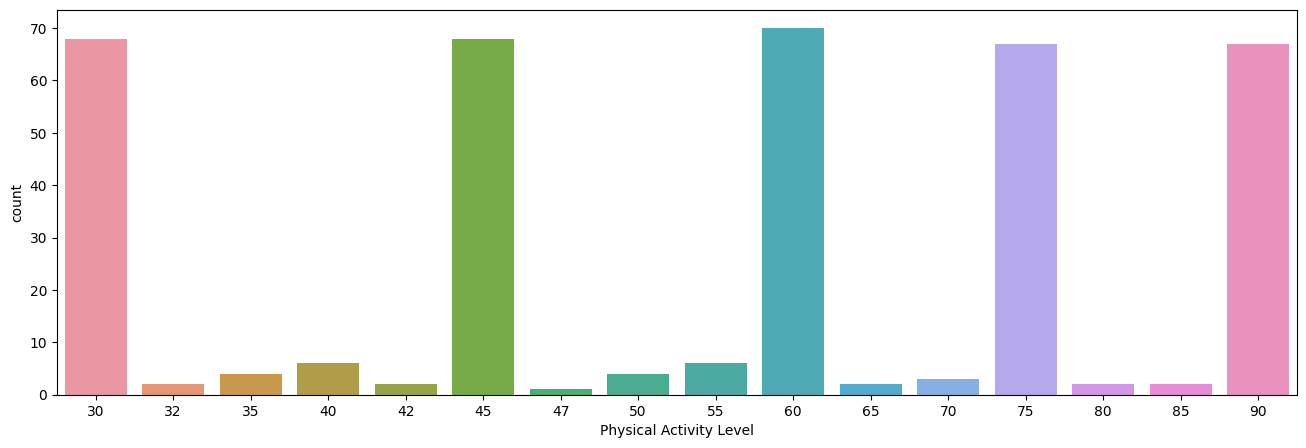

In [57]:
plt.figure(figsize=(16, 5))

sns.countplot(x=df["Physical Activity Level"])

In [58]:
df["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5])

In [59]:
df["Stress Level"].value_counts(normalize=True).mul(100).round(2)

Stress Level
3    18.98
8    18.72
4    18.72
5    17.91
7    13.37
6    12.30
Name: proportion, dtype: float64

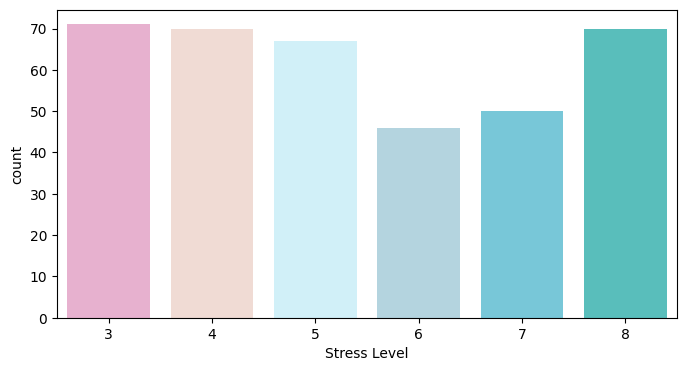

In [60]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Stress Level" ,data=df , palette=[ "#F0A8D0" ,"#F4D9D0"  ,"#CAF4FF"  ,"lightblue" ,"#68D2E8" ,"#48CFCB" ])
plt.show()

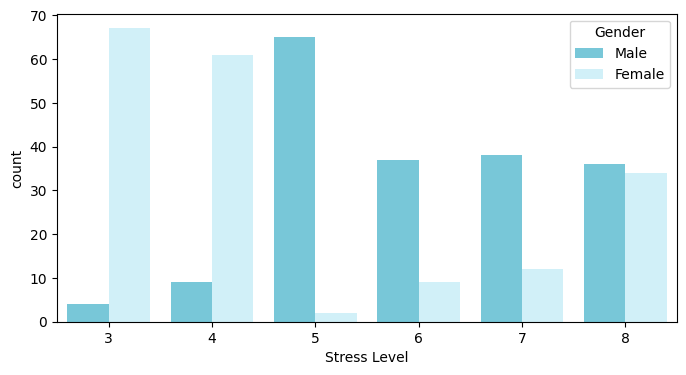

In [61]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Stress Level" , hue = "Gender" ,data=df , palette=[ "#68D2E8" ,"#CAF4FF"  ])
plt.show()

In [62]:
df.groupby("Stress Level")["Occupation"].value_counts()

Stress Level  Occupation          
3             Engineer                34
              Nurse                   31
              Doctor                   4
              Accountant               2
4             Teacher                 31
              Accountant              26
              Engineer                 9
              Nurse                    4
5             Lawyer                  44
              Engineer                16
              Doctor                   2
              Software Engineer        2
              Teacher                  2
              Manager                  1
6             Doctor                  32
              Accountant               3
              Lawyer                   3
              Nurse                    2
              Scientist                2
              Teacher                  2
              Engineer                 1
              Software Engineer        1
7             Salesperson             32
              Accounta

In [63]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [64]:
df["BMI Category"].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of  BMI Category'}, ylabel='count'>

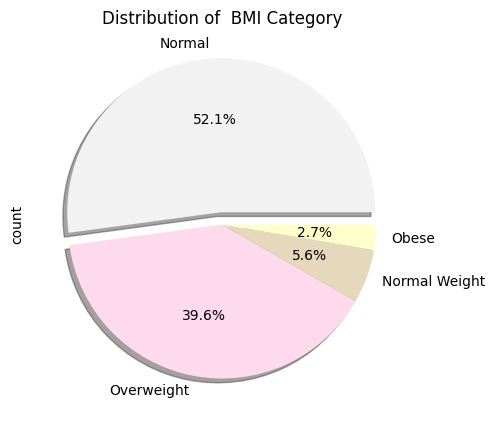

In [65]:
colors = plt.get_cmap('Pastel1_r').colors
df["BMI Category"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of  BMI Category', explode=(0.08,0 ,0,0) , shadow=True , colors=colors)

In [66]:
Occupation_BMI  = df.groupby(["BMI Category"])["Occupation"].value_counts()
Occupation_BMI

BMI Category   Occupation          
Normal         Doctor                  65
               Engineer                56
               Lawyer                  42
               Accountant              26
               Teacher                  6
Normal Weight  Nurse                    7
               Accountant               5
               Engineer                 4
               Doctor                   2
               Software Engineer        2
               Lawyer                   1
Obese          Doctor                   4
               Lawyer                   2
               Sales Representative     2
               Software Engineer        1
               Teacher                  1
Overweight     Nurse                   66
               Teacher                 33
               Salesperson             32
               Accountant               6
               Scientist                4
               Engineer                 3
               Lawyer                   

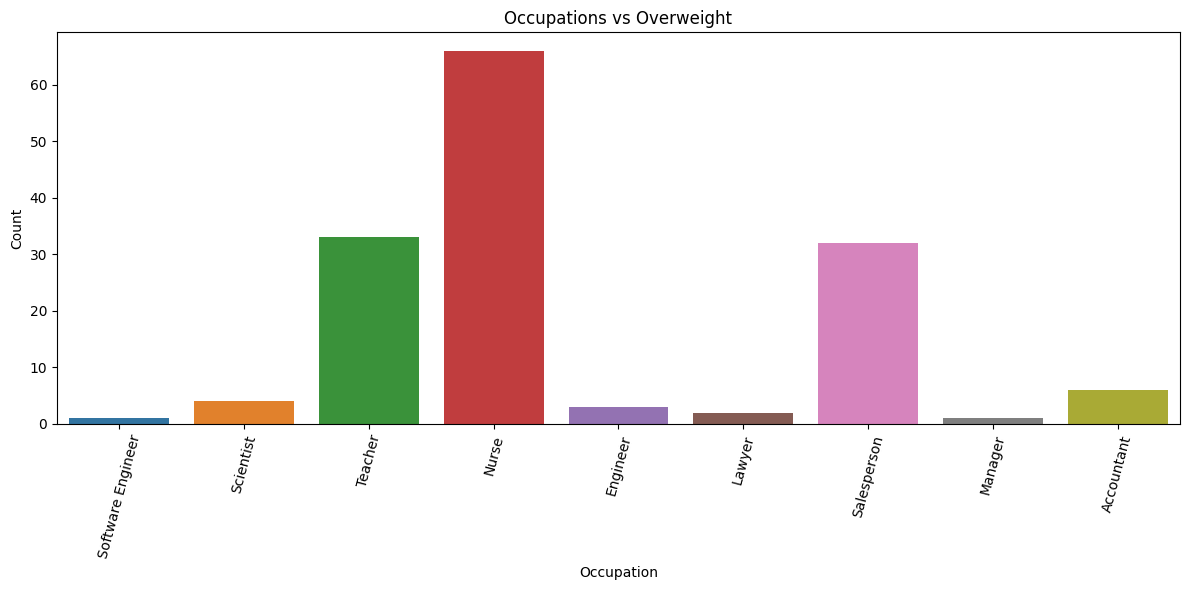

In [67]:

overweight_data = df[df['BMI Category'] == 'Overweight']
plt.figure(figsize=(12, 6))
sns.countplot(data=overweight_data, x='Occupation')
plt.title('Occupations vs Overweight')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=75)  
plt.tight_layout()
plt.show()

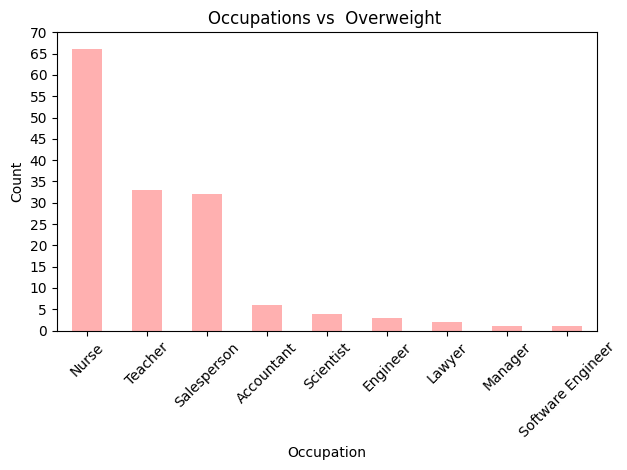

In [68]:
Occupation_BMI.loc["Overweight" , :].plot(kind= "bar" , color="#FFB0B0")
plt.title('Occupations vs  Overweight ')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(ticks=np.arange(0, Occupation_BMI.max() + 5, step=5))
plt.tight_layout()
plt.show()

In [69]:
df[(df['BMI Category'] == 'Overweight') & df["Occupation"]=="Doctor"]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
Person ID,,,,,,,,,,,


In [70]:
df["Blood Pressure"].value_counts()

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
132/87     3
128/85     3
126/83     2
115/78     2
139/91     2
142/92     2
119/77     2
135/88     2
129/84     2
128/84     2
131/86     2
117/76     2
130/86     2
118/75     2
121/79     1
122/80     1
118/76     1
Name: count, dtype: int64

In [71]:
pd.crosstab(index = df["Blood Pressure"] ,columns="count").sort_values(by="count", ascending=False)

col_0,count
Blood Pressure,
130/85,99
140/95,65
125/80,65
120/80,45
115/75,32
135/90,27
140/90,4
125/82,4
132/87,3


In [72]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

In [73]:
df.Systolic.describe()

count    374.000000
mean     128.553476
std        7.748118
min      115.000000
25%      125.000000
50%      130.000000
75%      135.000000
max      142.000000
Name: Systolic, dtype: float64

In [74]:
df.Diastolic.describe()

count    374.000000
mean      84.649733
std        6.161611
min       75.000000
25%       80.000000
50%       85.000000
75%       90.000000
max       95.000000
Name: Diastolic, dtype: float64

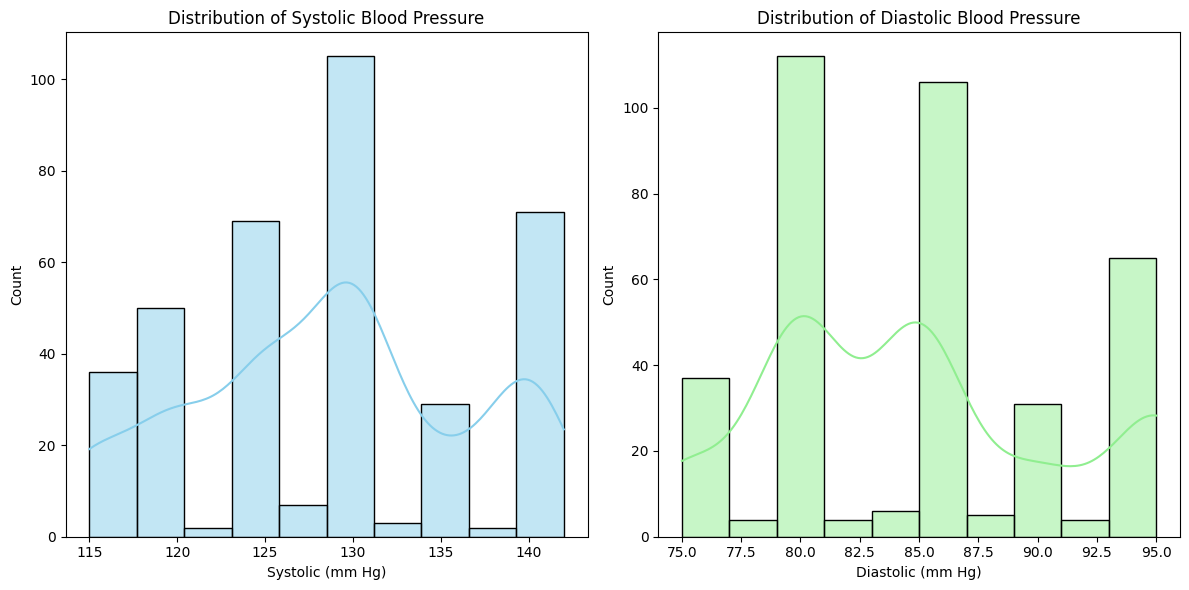

In [75]:
plt.figure(figsize=(12, 6))

# Histogram for Systolic
plt.subplot(1, 2, 1)
sns.histplot(df['Systolic'], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Systolic Blood Pressure")
plt.xlabel("Systolic (mm Hg)")

# Histogram for Diastolic
plt.subplot(1, 2, 2)
sns.histplot(df['Diastolic'], bins=10, kde=True, color="lightgreen")
plt.title("Distribution of Diastolic Blood Pressure")
plt.xlabel("Diastolic (mm Hg)")

plt.tight_layout()
plt.show()


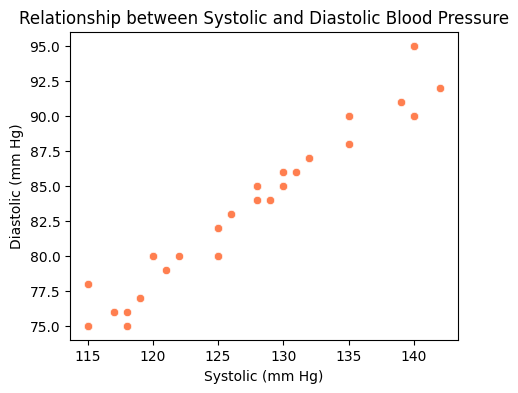

In [76]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Systolic', y='Diastolic', data=df, color="coral")
plt.title("Relationship between Systolic and Diastolic Blood Pressure")
plt.xlabel("Systolic (mm Hg)")
plt.ylabel("Diastolic (mm Hg)")
plt.show()


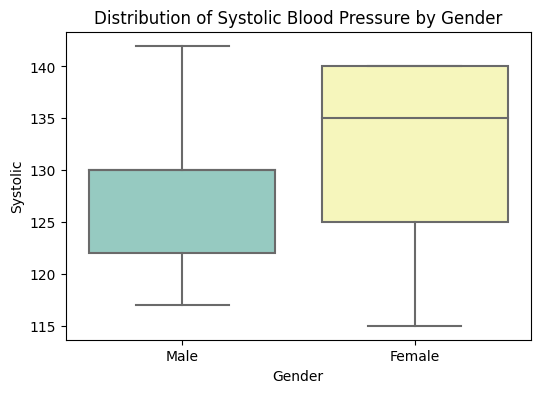

In [77]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Systolic', data=df, palette="Set3")
plt.title("Distribution of Systolic Blood Pressure by Gender")
plt.show()


In [78]:
def classify_bp(row):
    if row['Systolic'] < 120 and row['Diastolic'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic'] < 130 and row['Diastolic'] < 80:
        return 'Elevated'
    elif 130 <= row['Systolic'] < 140 or 80 <= row['Diastolic'] < 90:
        return 'Hypertension Stage1'
    else:
        return 'Hypertension Stage2'

df['BP Category'] = df.apply(classify_bp, axis=1)


In [79]:
df.sample(15)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Systolic,Diastolic,BP Category
Person ID,,,,,,,,,,,,,,
364,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,140,95,Hypertension Stage2
270,Female,49,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,140,95,Hypertension Stage2
184,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,130,85,Hypertension Stage1
201,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,130,85,Hypertension Stage1
307,Female,52,Accountant,6.5,7,45,7,Overweight,130/85,72,6000,130,85,Hypertension Stage1
356,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,140,95,Hypertension Stage2
40,Male,31,Doctor,7.6,7,75,6,Normal,120/80,70,8000,120,80,Hypertension Stage1
367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,140,95,Hypertension Stage2
229,Female,44,Teacher,6.6,7,45,4,Overweight,135/90,65,6000,135,90,Hypertension Stage1


In [80]:
df["BP Category"].value_counts()

BP Category
Hypertension Stage1    261
Hypertension Stage2     71
Normal                  41
Elevated                 1
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of  BP Category'}, ylabel='count'>

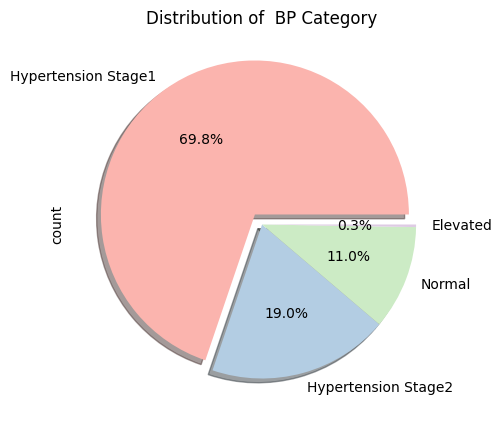

In [81]:
colors = plt.get_cmap('Pastel1').colors
df["BP Category"].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,5), title='Distribution of  BP Category', explode=(0.08,0 ,0,0) , shadow=True , colors=colors)

In [82]:
df.groupby("BP Category")["Gender"].value_counts()

BP Category          Gender
Elevated             Male        1
Hypertension Stage1  Male      180
                     Female     81
Hypertension Stage2  Female     65
                     Male        6
Normal               Female     39
                     Male        2
Name: count, dtype: int64

In [83]:
df.groupby(["Occupation"])["BP Category"].value_counts()

Occupation            BP Category        
Accountant            Normal                 31
                      Hypertension Stage1     6
Doctor                Hypertension Stage1    67
                      Hypertension Stage2     2
                      Normal                  2
Engineer              Hypertension Stage1    61
                      Elevated                1
                      Normal                  1
Lawyer                Hypertension Stage1    47
Manager               Hypertension Stage1     1
Nurse                 Hypertension Stage2    65
                      Hypertension Stage1     7
                      Normal                  1
Sales Representative  Hypertension Stage2     2
Salesperson           Hypertension Stage1    32
Scientist             Hypertension Stage1     4
Software Engineer     Hypertension Stage1     3
                      Hypertension Stage2     1
Teacher               Hypertension Stage1    33
                      Normal                  

In [84]:
df.groupby(["Gender", "Occupation"])["BP Category"].value_counts()

Gender  Occupation            BP Category        
Female  Accountant            Normal                 30
                              Hypertension Stage1     6
        Doctor                Normal                  2
        Engineer              Hypertension Stage1    32
        Lawyer                Hypertension Stage1     2
        Manager               Hypertension Stage1     1
        Nurse                 Hypertension Stage2    65
                              Hypertension Stage1     7
                              Normal                  1
        Scientist             Hypertension Stage1     4
        Teacher               Hypertension Stage1    29
                              Normal                  6
Male    Accountant            Normal                  1
        Doctor                Hypertension Stage1    67
                              Hypertension Stage2     2
        Engineer              Hypertension Stage1    29
                              Elevated                

<Axes: xlabel='BP Category', ylabel='count'>

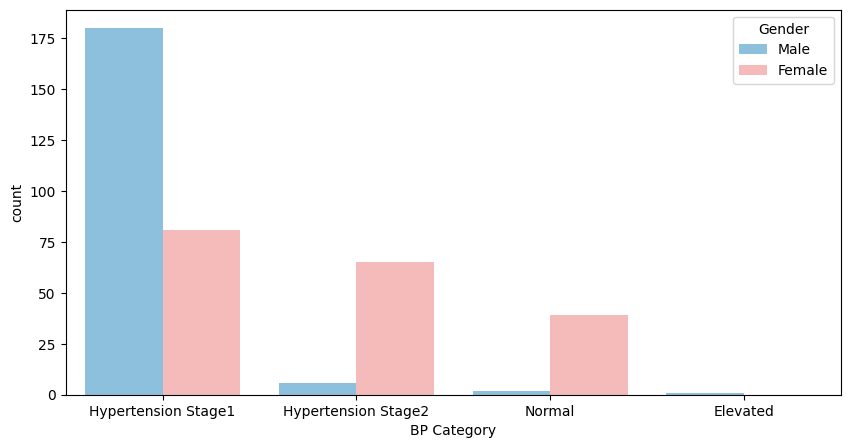

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(data= df , x="BP Category" , hue="Gender" ,palette=["#80C4E9" ,"#FFB1B1"])

In [86]:
bp_bmi_crosstab = pd.crosstab(df['BMI Category'], df['BP Category'])
print(bp_bmi_crosstab)


BP Category    Elevated  Hypertension Stage1  Hypertension Stage2  Normal
BMI Category                                                             
Normal                0                  163                    0      32
Normal Weight         1                   11                    0       9
Obese                 0                    4                    6       0
Overweight            0                   83                   65       0


In [87]:
bp_bmi_crosstab.loc["Overweight" , :]

BP Category
Elevated                0
Hypertension Stage1    83
Hypertension Stage2    65
Normal                  0
Name: Overweight, dtype: int64

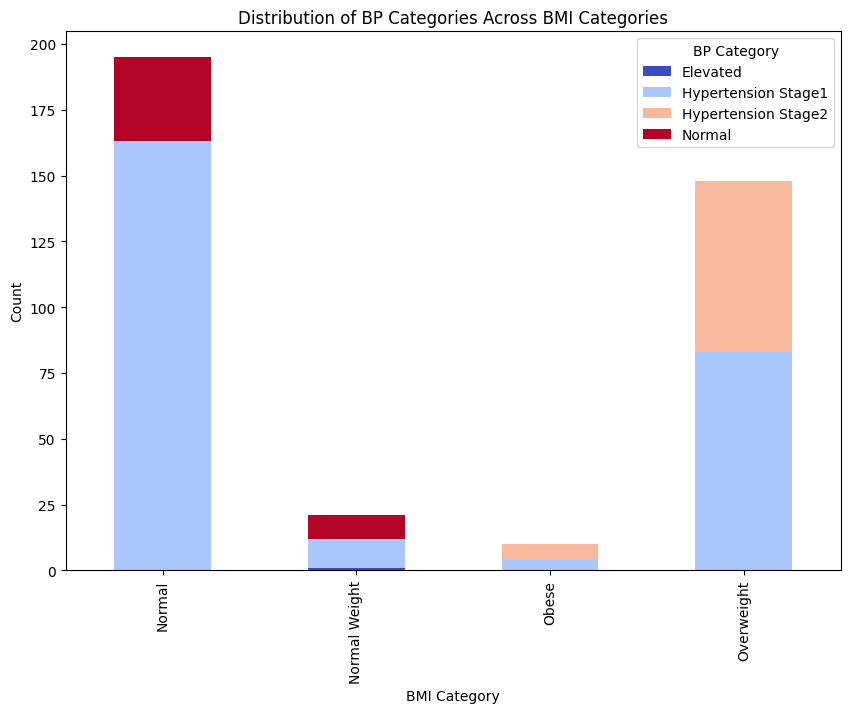

In [88]:
bp_bmi_crosstab.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='coolwarm')
plt.title('Distribution of BP Categories Across BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [89]:
df["Heart Rate"].value_counts()

Heart Rate
68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: count, dtype: int64

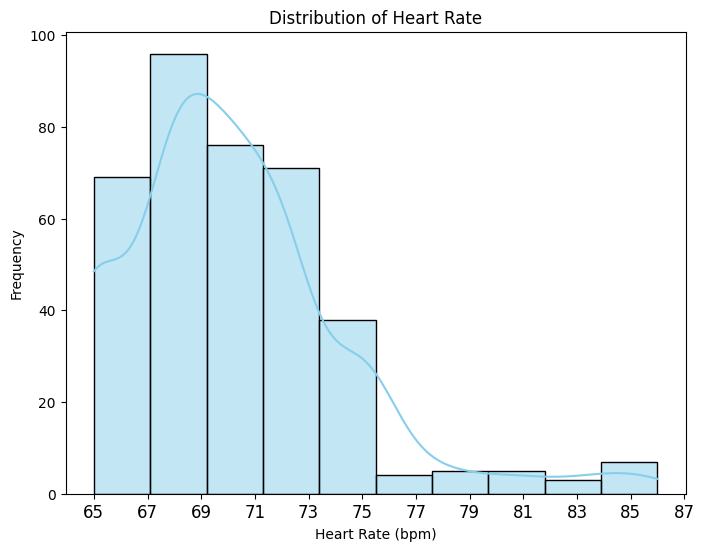

In [90]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Heart Rate"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Heart Rate")

plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(df["Heart Rate"].min(), df["Heart Rate"].max()+2 , step=2), fontsize=12)

plt.show()


In [91]:
df['Heart Rate'].describe()

count    374.000000
mean      70.165775
std        4.135676
min       65.000000
25%       68.000000
50%       70.000000
75%       72.000000
max       86.000000
Name: Heart Rate, dtype: float64

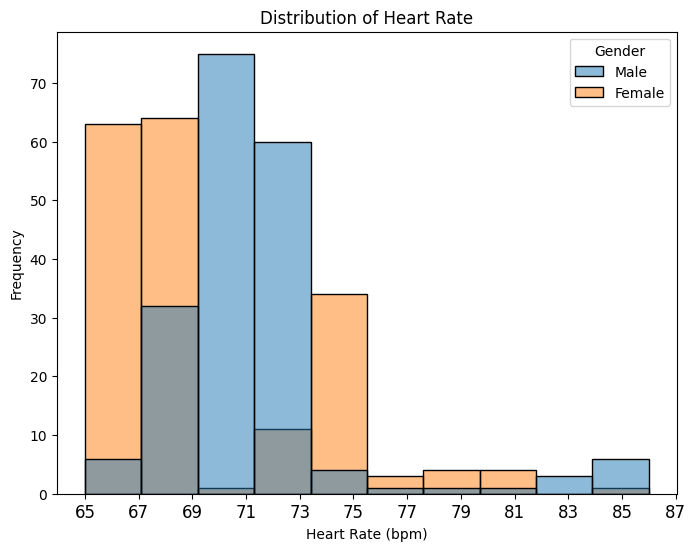

In [92]:
plt.figure(figsize=(8, 6))
sns.histplot(x=df["Heart Rate"], bins=10,  data=df , hue="Gender")
plt.title("Distribution of Heart Rate")

plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(df["Heart Rate"].min(), df["Heart Rate"].max()+2 , step=2), fontsize=12)

plt.show()


In [93]:
df["Daily Steps"].value_counts()

Daily Steps
8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: count, dtype: int64

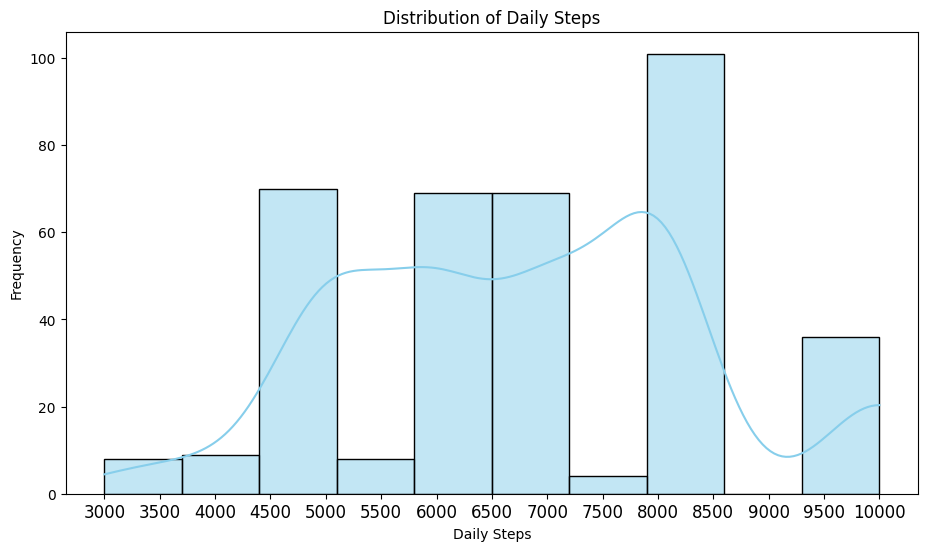

In [94]:
plt.figure(figsize=(11, 6))
sns.histplot(df["Daily Steps"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of Daily Steps")

plt.xlabel("Daily Steps")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(df["Daily Steps"].min(), df["Daily Steps"].max()+2 , step=500), fontsize=12)

plt.show()


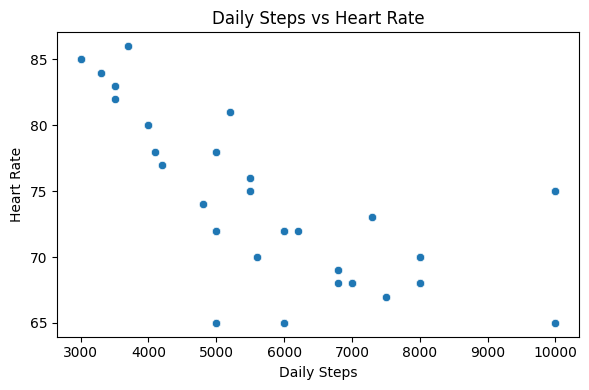

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(x='Daily Steps', y='Heart Rate', data=df)
plt.title('Daily Steps vs Heart Rate')
plt.xlabel('Daily Steps')
plt.ylabel('Heart Rate')
plt.tight_layout()
plt.show()

In [96]:
df["Heart Rate"].corr(df["Physical Activity Level"])

0.1369709832136317

In [97]:
df["Daily Steps"].corr(df["Physical Activity Level"])

0.7727230504529327

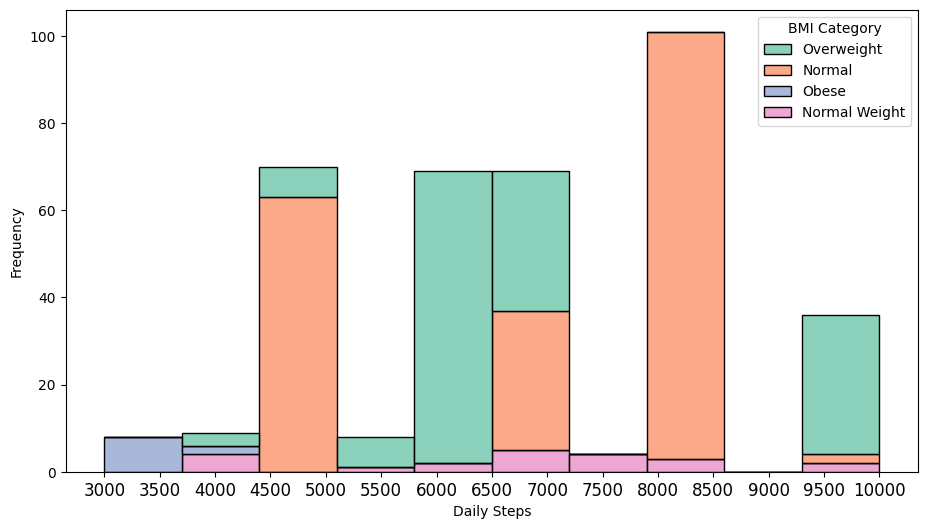

In [98]:
plt.figure(figsize=(11, 6))
sns.histplot(data =df , x=df["Daily Steps"], bins=10,  color="skyblue" , hue="BMI Category",multiple="stack", palette="Set2")
plt.xlabel("Daily Steps")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(df["Daily Steps"].min(), df["Daily Steps"].max()+2 , step=500), fontsize=12)

plt.show()


In [99]:
pd.set_option('display.max_rows', None)
new = df.groupby("Daily Steps")["Occupation"].value_counts().reset_index()
new

,Daily Steps,Occupation,count
0,3000,Sales Representative,2
1,3000,Software Engineer,1
2,3300,Lawyer,2
3,3500,Doctor,2
4,3500,Teacher,1
5,3700,Doctor,2
6,4000,Nurse,2
7,4000,Engineer,1
8,4100,Nurse,2
9,4200,Nurse,1


In [100]:
top_occupations = df.groupby("Daily Steps")["Occupation"].apply(lambda x: x.value_counts().index[0])
print(top_occupations)

Daily Steps
3000     Sales Representative
3300                   Lawyer
3500                   Doctor
3700                   Doctor
4000                    Nurse
4100                    Nurse
4200        Software Engineer
4800                  Teacher
5000                 Engineer
5200                Scientist
5500                Scientist
5600                  Teacher
6000              Salesperson
6200                 Engineer
6800                 Engineer
7000                    Nurse
7300               Accountant
7500               Accountant
8000                   Lawyer
10000                   Nurse
Name: Occupation, dtype: object


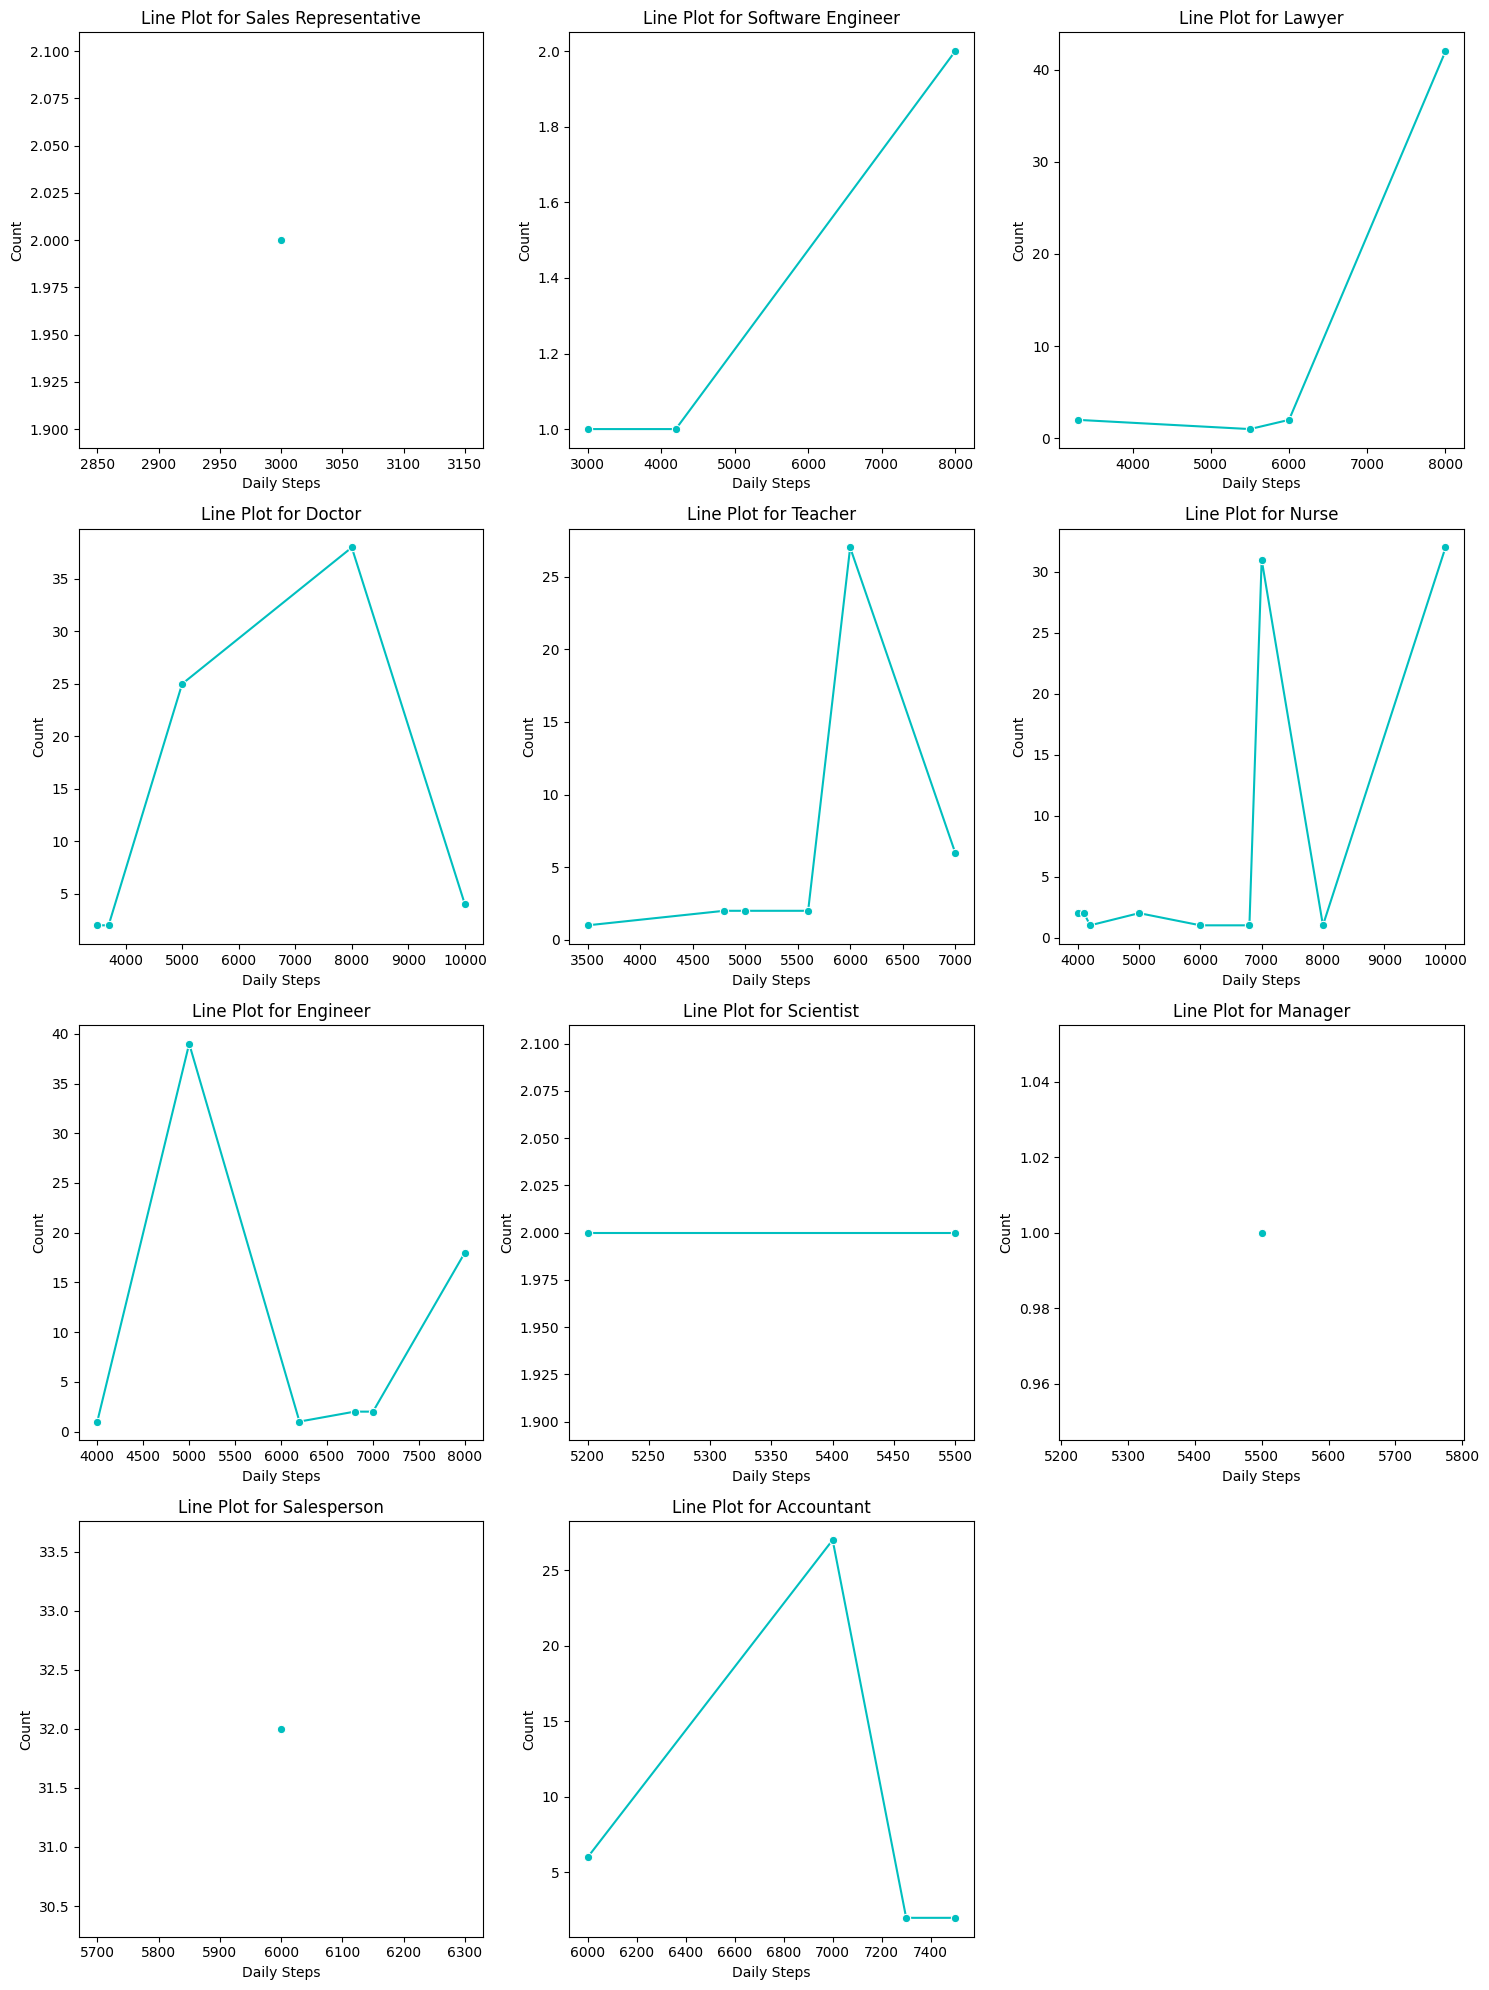

In [101]:
occupations = new['Occupation'].unique()
num_occupations = len(occupations)
num_cols = 3  
num_rows = (num_occupations + num_cols - 1) // num_cols  # حساب عدد الصفوف

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten() 


for ax, occupation in zip(axes, occupations):
    sns.lineplot(data=new[new['Occupation'] == occupation], x="Daily Steps", y="count", marker='o', ax=ax,color="c")
    ax.set_title(f'Line Plot for {occupation}')
    ax.set_xlabel('Daily Steps')
    ax.set_ylabel('Count')

# إخفاء المحاور غير المستخدمة
for ax in axes[num_occupations:]:
    ax.axis('off')

plt.tight_layout()
plt.show()